# NLP Classification - Sentiment Analysis

In [44]:
import pandas as pd
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
df = pd.read_csv("restaurant.csv",encoding="latin-1")
#ingilizce olmayan karakterleri tanımış oluyor

In [47]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [48]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [49]:
df.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date'],
      dtype='object')

In [50]:
df.drop(['Unnamed: 0', 'review_id', 'user_id', 'business_id'], axis=1, inplace=True)

In [51]:
df.head()

,stars,useful,funny,cool,text,date
0,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [52]:
df['text']=df['text'].str.lower() # Kucuk harfe cevirdik
df['text']=df['text'].str.replace('[^\w\s]','') #noktalama isaretlerini kaldirdik
df['text']=df['text'].str.replace('\d+','') #rakamlari kaldirdik
df['text']=df['text'].str.replace('\n',' ').replace('\r',' ') #Enter ve yeni satir kodlarini kaldirdik

In [53]:
df_ei_ek=df[(df.stars==5) | (df.stars==1)]

In [54]:
df_ei_ek.reset_index(drop=True,inplace=True)

In [55]:
df_ei_ek

,stars,useful,funny,cool,text,date
0,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18
1,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29
2,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17
3,5,0,0,0,really enjoyed everything they had to offer it...,2015-04-01 16:18:34
4,5,0,0,0,lots of choices good service line wasnt as lon...,2017-03-27 00:42:19
...,...,...,...,...,...,...
5298,5,1,0,0,we went to bacchanal on easter sunday as it wa...,2019-04-28 18:59:53
5299,1,0,0,0,came him from la thanksgiving week we decided ...,2019-12-05 18:01:49
5300,5,0,0,0,every time we visit las vegas we go to this bu...,2019-12-05 21:34:56
5301,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36


In [73]:
x = df_ei_ek["text"]
y = df_ei_ek["stars"]

In [74]:
df_ei_ek

,stars,useful,funny,cool,text,date
0,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18
1,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29
2,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17
3,5,0,0,0,really enjoyed everything they had to offer it...,2015-04-01 16:18:34
4,5,0,0,0,lots of choices good service line wasnt as lon...,2017-03-27 00:42:19
...,...,...,...,...,...,...
5298,5,1,0,0,we went to bacchanal on easter sunday as it wa...,2019-04-28 18:59:53
5299,1,0,0,0,came him from la thanksgiving week we decided ...,2019-12-05 18:01:49
5300,5,0,0,0,every time we visit las vegas we go to this bu...,2019-12-05 21:34:56
5301,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36


In [57]:
vect = CountVectorizer(lowercase=True,ngram_range=(1,3),stop_words="english")

In [58]:
x_yeni = vect.fit_transform(x)

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_yeni,y,random_state=42)

In [60]:
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()

In [61]:
mb.fit(x_train,y_train)

MultinomialNB()

In [62]:
tahmin=mb.predict(x_test)

In [63]:
accuracy_score(y_test,tahmin)

0.9321266968325792

# Word Cloud

In [64]:
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [69]:
good = df_ei_ek[df_ei_ek["stars"] == 5]["text"]
bad = df_ei_ek[df_ei_ek["stars"] == 1]["text"]

In [66]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask = np.array(Image.open("cloud.png"))
    wc = WordCloud(background_color = bgcolor,stopwords = STOPWORDS,mask=mask)
    wc.generate(''.join(data))
    plt.imshow(wc)
    plt.axis("off") #x ve y ekseni çizgilerini göstermemiş oluyoruz

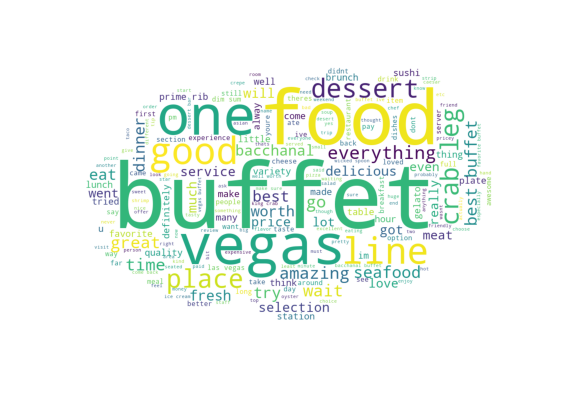

In [70]:
wc(good,"white")

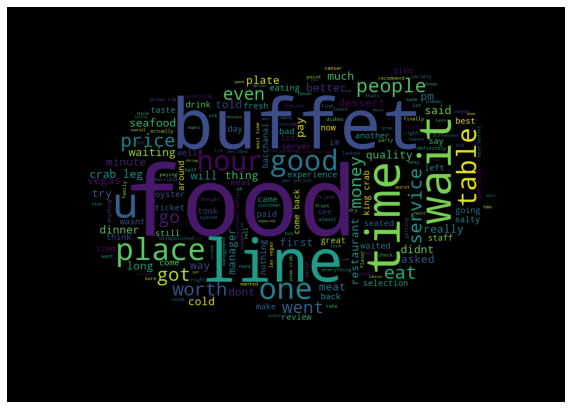

In [72]:
wc(bad,"black")

In [75]:
useful = df[df["useful"]==5]["text"]

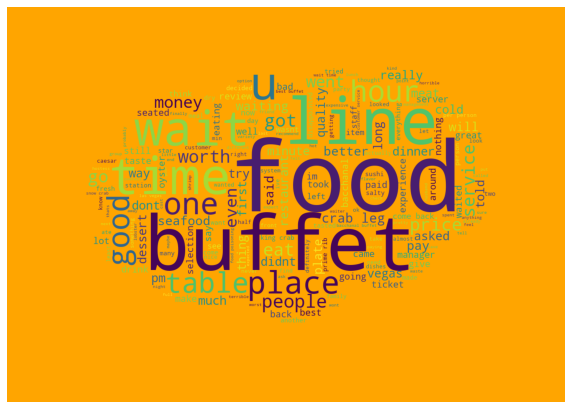

In [78]:
wc(bad,"orange")

In [79]:
useful = df[df["funny"]==5]["text"]

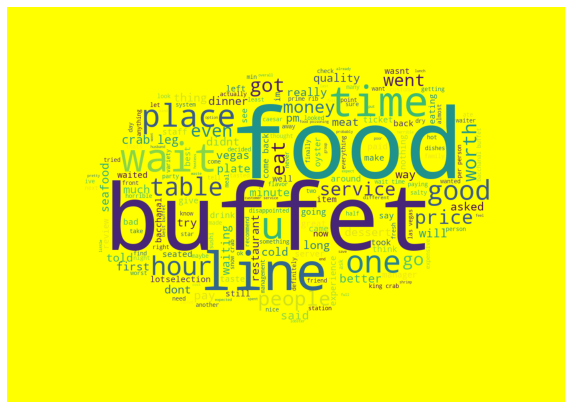

In [80]:
wc(bad,"yellow")